XGBOOST REGRESSOR

In [85]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import xgboost
from datetime import date,timedelta
import requests
import seaborn as sns

In [59]:
import warnings 
xgboost.set_config(verbosity=0)
warnings.filterwarnings('ignore')

In [60]:
api_key = "9b5bd2cd0c808cd58f2673a9a5a51a4b"
api_temp = "00f5abf172cb4b6e9d60aa5ae08ccdbe"
latitude = 13.082680
longitude = 80.270721
date = date.today() -  timedelta(days=1)
interval  = "15m"  #15 minute intervals

url_sunhours = "https://api.openweathermap.org/energy/1.0/solar/interval_data?lat={}&lon={}&date={}&interval={}&tz=+05:30&appid={}".format(latitude,longitude,date,interval,api_key)
url_temperature = "https://api.weatherbit.io/v2.0/history/subhourly?lat={}&lon={}&start_date={}&end_date={}&key={}".format(latitude,longitude,date,date,api_temp)


In [61]:
df = pd.read_csv("/Users/aditirajesh/Desktop/program_files/python/SolSight/DATA_PLANTS/plant1/data15_1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          34 non-null     object 
 1   AMBIENT_TEMP  34 non-null     float64
 2   MODULE_TEMP   34 non-null     float64
 3   SUN_HOURS     34 non-null     float64
 4   YIELD         34 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


In [62]:
df['YIELD'] = pd.to_numeric(df['YIELD'])
df['DATE'] = pd.to_datetime(df['DATE'])

In [63]:
x = df.iloc[:,1:4].values
y = df.iloc[:,-1].values

print(x)
print(y)

[[30.1  40.87  4.76]
 [28.69 38.97  4.66]
 [29.63 42.44  5.73]
 [25.22 33.84  3.82]
 [27.49 38.08  4.51]
 [27.21 40.35  4.56]
 [29.38 45.34  5.89]
 [28.61 41.12  5.53]
 [29.39 45.66  6.53]
 [29.92 43.73  6.23]
 [29.94 45.11  6.81]
 [29.6  43.87  6.06]
 [29.59 41.67  5.13]
 [29.77 43.83  6.51]
 [28.06 44.42  6.2 ]
 [26.88 39.17  5.47]
 [27.07 37.55  4.41]
 [26.64 36.41  4.41]
 [25.98 37.3   5.37]
 [26.38 37.92  5.48]
 [27.26 40.54  6.17]
 [26.72 39.71  5.8 ]
 [26.22 36.67  4.88]
 [26.86 40.54  6.1 ]
 [27.51 40.88  6.33]
 [28.04 41.24  6.19]
 [26.67 36.5   4.81]
 [25.84 33.65  3.88]
 [25.52 33.59  4.08]
 [26.5  39.44  6.35]
 [25.57 36.26  5.28]
 [26.66 37.22  4.94]
 [26.56 36.59  4.49]
 [25.59 34.39  4.25]]
[6176.   6450.   7391.   5286.   6790.   8663.75 7598.57 7000.   8394.86
 7554.75 8085.   7712.   6564.   8314.75 7951.   7146.   5965.   5751.
 7326.33 7698.62 8009.   7456.5  6197.   8019.   8216.29 7844.88 6277.
 5520.25 5709.38 8254.43 7164.75 6563.71 6123.71 5757.43]


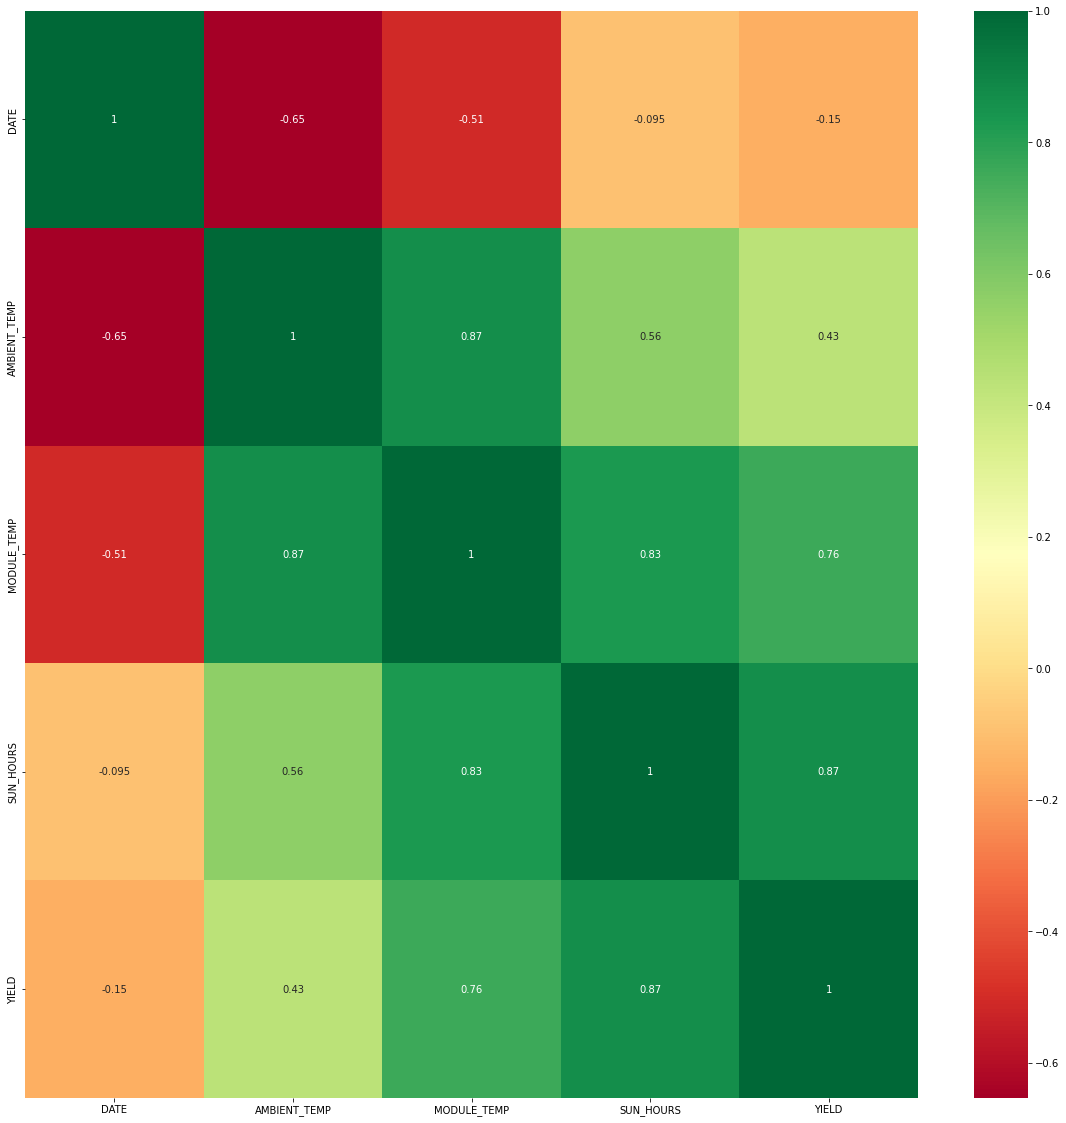

In [64]:
corrmat = df[1:].corr()
top_corr = corrmat.index 
plt.figure(figsize=(20,20))
g = sb.heatmap(df[top_corr].corr(),annot=True,cmap="RdYlGn")

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)


In [66]:
params = {
    "learning_rate" : [0.01,0.05,0.10],
    "max_depth" : [3,4,5],
    "n_estimators": [1100,1200,1500],
    "gamma": [0.0,0.1,0.2],
    "colsample_bytree": [0.8,0.9,1.0]
}

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [68]:
from xgboost import XGBRegressor
xg_regressor = XGBRegressor()
eval_set = [(x_test,y_test)]

In [69]:
random_search = RandomizedSearchCV(xg_regressor,
                                   param_distributions=params,
                                   n_iter=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv = 5,
                                   verbose=3)

random_search.fit(x_train,y_train,eval_metric="error",eval_set=eval_set,verbose=True)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[0]	validation_0-error:-6694.08419
[1]	validation_0-error:-6694.08419
[2]	validation_0-error:-6694.08419
[3]	validation_0-error:-6694.08419
[4]	validation_0-error:-6694.08419
[5]	validation_0-error:-6694.08419
[6]	validation_0-error:-6694.08419
[7]	validation_0-error:-6694.08419
[8]	validation_0-error:-6694.08419
[9]	validation_0-error:-6694.08419
[10]	validation_0-error:-6694.08419
[11]	validation_0-error:-6694.08419
[12]	validation_0-error:-6694.08419
[13]	validation_0-error:-6694.08419
[14]	validation_0-error:-6694.08419
[0]	validation_0-error:-6694.08419
[15]	validation_0-error:-6694.08419
[16]	validation_0-error:-6694.08419
[1]	validation_0-error:-6694.08419
[2]	validation_0-error:-6694.08419
[0]	validation_0-error:-6694.08419
[17]	validation_0-error:-6694.08419
[18]	validation_0-error:-6694.08419
[19]	validation_0-error:-6694.08419
[20]	validation_0-error:-6694.08419
[3]	validation_0-error:-6694.08419
[1]	validation_0-er

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated fo

[9]	validation_0-error:-6694.08419
[574]	validation_0-error:-6694.08419
[497]	validation_0-error:-6694.08419
[530]	validation_0-error:-6694.08419
[238]	validation_0-error:-6694.08419
[575]	validation_0-error:-6694.08419
[440]	validation_0-error:-6694.08419
[498]	validation_0-error:-6694.08419
[10]	validation_0-error:-6694.08419
[531]	validation_0-error:-6694.08419
[576]	validation_0-error:-6694.08419
[441]	validation_0-error:-6694.08419
[499]	validation_0-error:-6694.08419[239]	validation_0-error:-6694.08419[577]	validation_0-error:-6694.08419
[532]	validation_0-error:-6694.08419
[11]	validation_0-error:-6694.08419

[442]	validation_0-error:-6694.08419
[533]	validation_0-error:-6694.08419
[240]	validation_0-error:-6694.08419
[12]	validation_0-error:-6694.08419
[443]	validation_0-error:-6694.08419
[500]	validation_0-error:-6694.08419
[534]	validation_0-error:-6694.08419
[501]	validation_0-error:-6694.08419[444]	validation_0-error:-6694.08419

[535]	validation_0-error:-6694.08419
[13]	va

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/Library/Frameworks/Python.framew

[299]	validation_0-error:-6694.08419
[306]	validation_0-error:-6694.08419
[396]	validation_0-error:-6694.08419[342]	validation_0-error:-6694.08419

[300]	validation_0-error:-6694.08419
[343]	validation_0-error:-6694.08419
[397]	validation_0-error:-6694.08419
[301]	validation_0-error:-6694.08419
[307]	validation_0-error:-6694.08419
[344]	validation_0-error:-6694.08419
[398]	validation_0-error:-6694.08419
[302]	validation_0-error:-6694.08419
[345]	validation_0-error:-6694.08419
[399]	validation_0-error:-6694.08419
[308]	validation_0-error:-6694.08419
[303]	validation_0-error:-6694.08419
[346]	validation_0-error:-6694.08419
[400]	validation_0-error:-6694.08419
[304]	validation_0-error:-6694.08419
[347]	validation_0-error:-6694.08419
[401]	validation_0-error:-6694.08419
[309]	validation_0-error:-6694.08419
[305]	validation_0-error:-6694.08419
[348]	validation_0-error:-6694.08419
[402]	validation_0-error:-6694.08419
[306]	validation_0-error:-6694.08419
[310]	validation_0-error:-6694.08419
[

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/Library/Frameworks/Python.framew

[950]	validation_0-error:-6694.08419
[992]	validation_0-error:-6694.08419
[951]	validation_0-error:-6694.08419
[993]	validation_0-error:-6694.08419
[952]	validation_0-error:-6694.08419
[994]	validation_0-error:-6694.08419
[953]	validation_0-error:-6694.08419
[995]	validation_0-error:-6694.08419
[954]	validation_0-error:-6694.08419
[996]	validation_0-error:-6694.08419
[955]	validation_0-error:-6694.08419
[997]	validation_0-error:-6694.08419
[956]	validation_0-error:-6694.08419
[998]	validation_0-error:-6694.08419
[957]	validation_0-error:-6694.08419
[999]	validation_0-error:-6694.08419
[958]	validation_0-error:-6694.08419
[959]	validation_0-error:-6694.08419
[960]	validation_0-error:-6694.08419
[961]	validation_0-error:-6694.08419
[962]	validation_0-error:-6694.08419
[963]	validation_0-error:-6694.08419
[964]	validation_0-error:-6694.08419
[965]	validation_0-error:-6694.08419
[966]	validation_0-error:-6694.08419
[967]	validation_0-error:-6694.08419
[968]	validation_0-error:-6694.08419
[

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/Library/Frameworks/Python.framew

[52]	validation_0-error:-6694.08419[394]	validation_0-error:-6694.08419

[395]	validation_0-error:-6694.08419
[53]	validation_0-error:-6694.08419
[396]	validation_0-error:-6694.08419
[54]	validation_0-error:-6694.08419
[305]	validation_0-error:-6694.08419
[397]	validation_0-error:-6694.08419
[485]	validation_0-error:-6694.08419
[55]	validation_0-error:-6694.08419
[398]	validation_0-error:-6694.08419
[306]	validation_0-error:-6694.08419
[56]	validation_0-error:-6694.08419
[486]	validation_0-error:-6694.08419
[399]	validation_0-error:-6694.08419
[487]	validation_0-error:-6694.08419
[57]	validation_0-error:-6694.08419
[488]	validation_0-error:-6694.08419
[400]	validation_0-error:-6694.08419
[307]	validation_0-error:-6694.08419
[58]	validation_0-error:-6694.08419
[489]	validation_0-error:-6694.08419
[401]	validation_0-error:-6694.08419
[59]	validation_0-error:-6694.08419
[490]	validation_0-error:-6694.08419
[402]	validation_0-error:-6694.08419
[308]	validation_0-error:-6694.08419
[60]	vali

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/Library/Frameworks/Python.framew

[721]	validation_0-error:-6694.08419
[476]	validation_0-error:-6694.08419
[1041]	validation_0-error:-6694.08419
[471]	validation_0-error:-6694.08419
[1134]	validation_0-error:-6694.08419
[976]	validation_0-error:-6694.08419
[155]	validation_0-error:-6694.08419
[1042]	validation_0-error:-6694.08419
[477]	validation_0-error:-6694.08419
[1135]	validation_0-error:-6694.08419
[722]	validation_0-error:-6694.08419
[977]	validation_0-error:-6694.08419
[472]	validation_0-error:-6694.08419
[1043]	validation_0-error:-6694.08419
[1136]	validation_0-error:-6694.08419[156]	validation_0-error:-6694.08419

[978]	validation_0-error:-6694.08419
[478]	validation_0-error:-6694.08419
[723]	validation_0-error:-6694.08419
[473]	validation_0-error:-6694.08419
[1042]	validation_0-error:-6694.08419
[979]	validation_0-error:-6694.08419
[479]	validation_0-error:-6694.08419
[157]	validation_0-error:-6694.08419
[1137]	validation_0-error:-6694.08419
[980]	validation_0-error:-6694.08419
[1043]	validation_0-error:-669

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/Library/Frameworks/Python.framew

[15]	validation_0-error:-6694.08419
[881]	validation_0-error:-6694.08419
[882]	validation_0-error:-6694.08419
[16]	validation_0-error:-6694.08419
[883]	validation_0-error:-6694.08419
[17]	validation_0-error:-6694.08419
[884]	validation_0-error:-6694.08419
[18]	validation_0-error:-6694.08419
[885]	validation_0-error:-6694.08419
[19]	validation_0-error:-6694.08419
[886]	validation_0-error:-6694.08419
[20]	validation_0-error:-6694.08419
[887]	validation_0-error:-6694.08419
[21]	validation_0-error:-6694.08419
[888]	validation_0-error:-6694.08419
[22]	validation_0-error:-6694.08419
[889]	validation_0-error:-6694.08419
[23]	validation_0-error:-6694.08419
[890]	validation_0-error:-6694.08419
[891]	validation_0-error:-6694.08419
[892]	validation_0-error:-6694.08419
[893]	validation_0-error:-6694.08419
[894]	validation_0-error:-6694.08419
[895]	validation_0-error:-6694.08419
[896]	validation_0-error:-6694.08419
[897]	validation_0-error:-6694.08419
[898]	validation_0-error:-6694.08419
[899]	vali

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[68]	validation_0-error:-6694.08419
[69]	validation_0-error:-6694.08419
[70]	validation_0-error:-6694.08419
[71]	validation_0-error:-6694.08419
[72]	validation_0-error:-6694.08419
[73]	validation_0-error:-6694.08419
[74]	validation_0-error:-6694.08419
[75]	validation_0-error:-6694.08419
[76]	validation_0-error:-6694.08419
[77]	validation_0-error:-6694.08419
[78]	validation_0-error:-6694.08419
[79]	validation_0-error:-6694.08419
[80]	validation_0-error:-6694.08419
[81]	validation_0-error:-6694.08419
[82]	validation_0-error:-6694.08419
[83]	validation_0-error:-6694.08419
[84]	validation_0-error:-6694.08419
[85]	validation_0-error:-6694.08419
[86]	validation_0-error:-6694.08419
[87]	validation_0-error:-6694.08419
[88]	validation_0-error:-6694.08419
[89]	validation_0-error:-6694.08419
[90]	validation_0-error:-6694.08419
[91]	validation_0-error:-6694.08419
[92]	validation_0-error:-6694.08419
[93]	validation_0-error:-6694.08419
[94]	validation_0-error:-6694.08419
[95]	validation_0-error:-669

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0.0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [1100, 1200, 1500]},
                   scoring='roc_auc', verbose=3)

In [70]:
random_search.best_params_

{'n_estimators': 1200,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.9}

In [71]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
xg_regressor= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.1, learning_rate=1,
       max_delta_step=0, max_depth=5, min_child_weight=7, missing=1,
       n_estimators=1200, n_jobs=1, nthread=None, random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None,
       subsample=1,
       objective="reg:squarederror")



In [73]:

y_pred = random_search.predict(x_test)
y_train_pred = random_search.predict(x_train)


In [74]:
xg_regressor.fit(x,y)
y2_pred = xg_regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y2_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7952.13 7951.  ]
 [7698.03 7698.62]
 [5568.45 5286.  ]
 [5568.45 5520.25]
 [6123.94 6123.71]
 [6277.51 6277.  ]
 [8009.28 8009.  ]]


In [75]:
xg_regressor.score(x_train,y_train)

0.9829289433328369

In [76]:
xg_regressor.score(x_test,y_test)

0.9899600978703705

In [77]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7845.04 7951.  ]
 [6867.31 7698.62]
 [5709.97 5286.  ]
 [5740.36 5520.25]
 [5752.28 6123.71]
 [6216.47 6277.  ]
 [8074.25 8009.  ]]


In [78]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print(rmse)

0.6350962261852243


In [79]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

392.1359735261595


In [80]:
from sklearn.model_selection import cross_val_score,RepeatedKFold
scores = cross_val_score(xg_regressor,x,y,scoring="neg_mean_squared_error",cv=10,error_score='raise')
print(scores)

[-1195029.14 -2062290.55  -161732.93   -99637.26   -52803.1   -762205.35
  -176877.81   -11106.85  -240633.77  -214592.88]


In [81]:
rmse = np.sqrt(-scores)
print(rmse)

[1093.17 1436.07  402.16  315.65  229.79  873.04  420.57  105.39  490.54
  463.24]


In [82]:
response = requests.get(url_temperature)
data = response.json()
print(data)


{'error': 'end_date is equal to start_date. end_date should be after start_date.'}


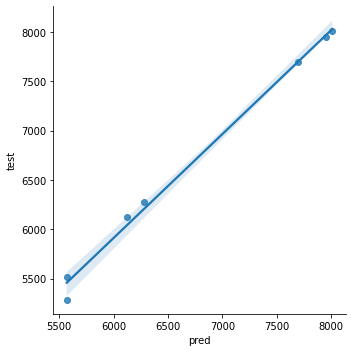

In [86]:
data = pd.DataFrame({'pred':y2_pred,'test':y_test})

sns.lmplot(x="pred", y="test", data=data)

plt.show()